<h1>Приоритизация гипотез по фреймворкам ICE и RICE<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-данных-и-постановка-задач" data-toc-modified-id="Описание-данных-и-постановка-задач-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание данных и постановка задач</a></span></li><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Загрузка-и-изучение-данных,-подготовка-их-к-анализу" data-toc-modified-id="Загрузка-и-изучение-данных,-подготовка-их-к-анализу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Загрузка и изучение данных, подготовка их к анализу</a></span></li><li><span><a href="#Приоритизация-гипотез--по-ICE" data-toc-modified-id="Приоритизация-гипотез--по-ICE-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Приоритизация гипотез  по ICE</a></span></li><li><span><a href="#Приоритизация-гипотез-по-RICE" data-toc-modified-id="Приоритизация-гипотез-по-RICE-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Приоритизация гипотез по RICE</a></span></li><li><span><a href="#Сравнение-гипотез-во-фреймворках-ICE-и-RICE" data-toc-modified-id="Сравнение-гипотез-во-фреймворках-ICE-и-RICE-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Сравнение гипотез во фреймворках ICE и RICE</a></span></li><li><span><a href="#Вывод-о-приоритетности-выдвинутых-гипотез" data-toc-modified-id="Вывод-о-приоритетности-выдвинутых-гипотез-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Вывод о приоритетности выдвинутых гипотез</a></span></li></ul></div>

## Описание данных и постановка задач

Отделом маркетинга крупного интернет-магазина подготовлен список гипотез для увеличения выручки с указанными параметрами Reach, Impact, Confidence, Effort.

Необходимо приоритизировать гипотезы:
- Применить фреймворк ICE для приоритизации гипотез и отсортировать их по убыванию приоритета.
- Применить фреймворк RICE для приоритизации гипотез и отсортировать их по убыванию приоритета.
- Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

## Импорт библиотек

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Загрузка и изучение данных, подготовка их к анализу

In [2]:
hypothesis = pd.read_csv('hypothesis.csv')

In [3]:
hypothesis.sample(1)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6


In [4]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
#используем настройку для максимального отображения текста в таблице
pd.set_option('display.max_colwidth', -1)
#заменяем заглавные буквы прописными в названиях столбцов
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Дана таблица из 9 строк и 5 столбцоы с формулировкой гипотез и указанными для них параметрами Reach, Impact, Confidence, Effort. Пропусков и дубликатов нет. Заменили регистр в названии столбцов.

## Приоритизация гипотез  по ICE

ICE (от англ. impact, confidence, effort / ease «влияние, уверенность, усилия / простота»)

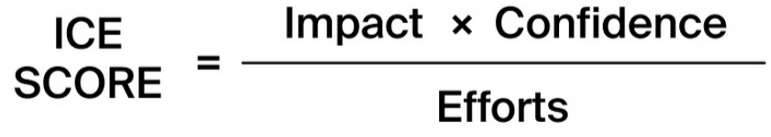

* Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
* Confidence — насколько уверены, что это изменение повлияет на пользователей именно так;
* Efforts — сколько стоит протестировать эту гипотезу.

In [10]:
hypothesis['ice'] = (hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']).round(2)
display(hypothesis[['hypothesis','ice']].sort_values(by ='ice', ascending=False))

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Наиболее перспективные гипотезы по ICE: 8, 0, 7, 6, 2. Впереди: акции со скидками для именинников, добавление новых каналов привлечения трафика и форма подписки на e-mail рассылки.

## Приоритизация гипотез по RICE

Модификация метода ICE во фреймворк RICE добавлением параметра Reach (R - от англ. reach, «охват»):

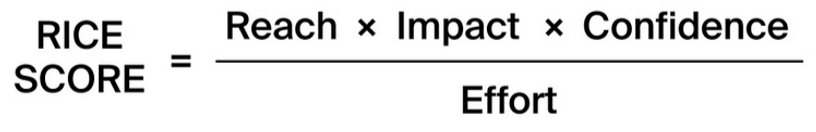

* Reach — скольких пользователей затронет изменение, которое хотим внести.

In [12]:
hypothesis['rice'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
display(hypothesis[['hypothesis', 'rice', 'ice']].sort_values(by ='rice', ascending=False))

,hypothesis,rice,ice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0,11.20
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0,7.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0,13.33
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0,8.00
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2,16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0,1.12
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0,1.33
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0,1.00


Наиболее перспективные гипотезы по RICE: 7, 2, 0, 6, 8. Те же самые гипотезы, что и по ICE, но приоритет поменялся, на первом месте - гипотеза 7 (форма сбора адресов для подписки на e-mail рассылки), у нее самый большой (максимальный) параметр REACH из приоритетных гипотез, ожидается, что она сильнее всех затронет пользователей, что позволило этой гипотезе вырваться вперед с большим отрывом.

Посмотрим на графике баллы, полученными гипотезами в обоих фреймворках ICE и RICE.

## Сравнение гипотез во фреймворках ICE и RICE

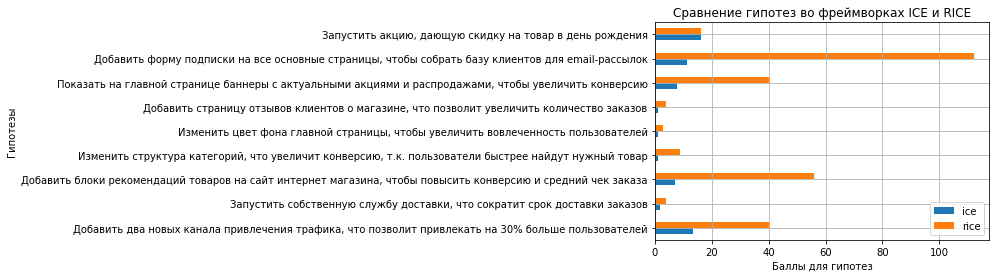

In [8]:
hypothesis.set_index('hypothesis')[['ice', 'rice']].plot(kind = 'barh', grid=True)
plt.xlabel('Баллы для гипотез')
plt.ylabel('Гипотезы')
plt.title('Сравнение гипотез во фреймворках ICE и RICE')
plt.show()

При учете параметра REACH вперед вырываются e-mail рассылки и блоки с рекомендациями товаров, обогнав баннеры с акциями/распродажами и новые каналы привлечения трафика.

## Вывод о приоритетности выдвинутых гипотез

Среди 9 выдвинутых отделом маркетинга гипотез наиболее перспективными для увеличения выручки полагаем:

гипотезу 7: "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", поскольку с высокой степенью уверенности ожидается, что она затронет максимальное число пользователей и даст сильный эффект на удовлетворение пользователей от продукта, и затраты на реализацию этого проекта - средние.

гипотезу 2: "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа" - также ожидается, что это затронет много пользователей, и, хотя есть убеждение, что эффект будет не очень большим, затраты на реализацию этого проекта - также низкие, что дает гипотезе премущество.

гипотезу 0: "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" - затронет не очень много потенциальных пользователей, но с большой уверенностью ожидается максимальный эффект от этого проекта среди всех рассматриваемых, однако довольно высоки затраты на реализацию.

гипотезу 6: "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию" - затронет половину пользователей, с большой степенью уверенности ожидается, что при небольших затратах даст средний эффект.

гипотезу 8: "Запустить акцию, дающую скидку на товар в день рождения" - затронет не более 1/10 пользователей, но со средними затратами, уверенно ожидается, что даст сильнейший эффект.